In [16]:
import lalsimulation
import lal
import numpy as np
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

In [17]:
Msun = lal.MSUN_SI

M1 = 40.0 * Msun
M2 = 40.0 * Msun

PctMe = lal.PC_SI 
Dist = 160.0 * 1e6 * PctMe

dt = 1.0/4096.0

In [18]:
hp, hc=lalsimulation.SimInspiralChooseTDWaveform(M1,M2,0,0,0,0,0,0,
                                                     Dist,0,0,0,0,0,dt,10,0,
                                                     lal.CreateDict(),lalsimulation.IMRPhenomD)
hp = hp.data.data
hc = hc.data.data
t = np.arange(len(hp)) * dt

<IPython.core.display.Javascript object>


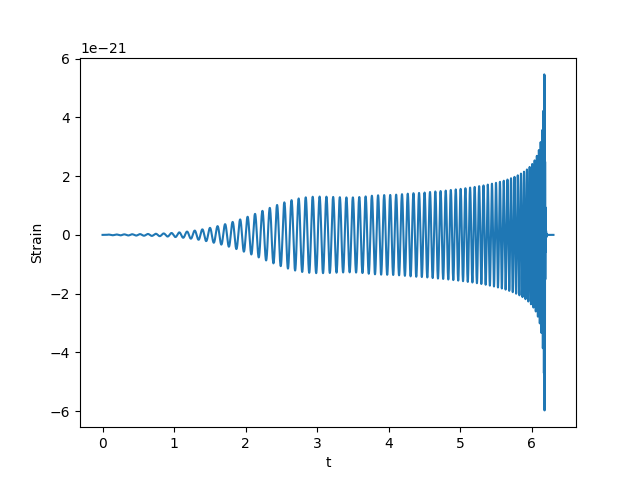

Text(0,0.5,'Strain')

In [19]:
plt.plot(t, hp)
plt.xlabel('t')
plt.ylabel('Strain')


In [57]:
0.4 * 180.0 / np.pi

22.91831180523293

In [13]:
h = hp + hc

<IPython.core.display.Javascript object>


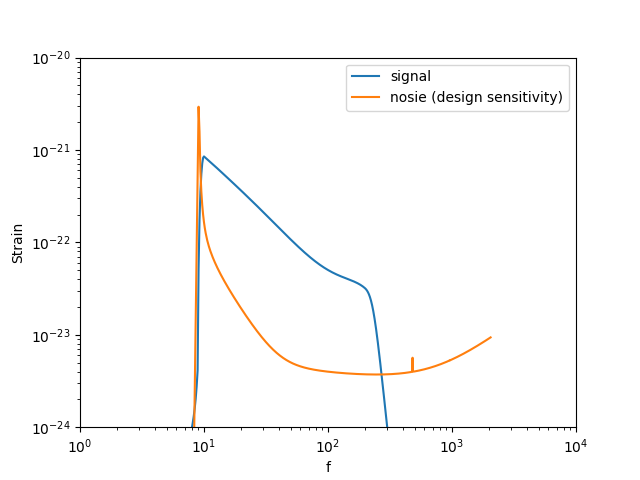

In [56]:
wave_f = np.fft.rfft(h) * dt
f_points = np.arange(len(wave_f)) * (1.0/ len(hp)/dt)
plt.plot(f_points, abs(wave_f), label = 'signal')
plt.xlabel('f')
plt.ylabel('Strain')
plt.plot(f_points, nos, label = 'nosie (design sensitivity)')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlim([1,10000])
plt.ylim(1e-24, 1e-20)
plt.show()

In [25]:
def ASDtxt(x):
    return {
        'H1': 'ligoII_NS.txt',
        'L1': 'ligoII_NS.txt',
        'V1': 'virgoII.txt',
        'I2': 'ligoII_NS.txt',
        'KAGRA': 'ligoII_NS.txt',
        'ET_1': 'ET_D.txt',
    }[x]

In [26]:
def readnos(detector, f_points):
    nos_file = ASDtxt(detector)
    f_str = []
    ASD_str = []
    file = open(nos_file, 'r')
    readFile = file.readlines()
    file.close()
    f = []
    ASD = []

    for line in readFile:
        p = line.split()
        f_str.append(float(p[0]))
        ASD_str.append(float(p[1]))
    f = np.log10(np.array(f_str))
    ASD = np.log10(np.array(ASD_str))
    nosextrapolate = interpolate.InterpolatedUnivariateSpline(f, ASD,k = 1)
    nos = nosextrapolate(np.log10(f_points))
    nos = 10**nos
    
    return nos

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


<IPython.core.display.Javascript object>


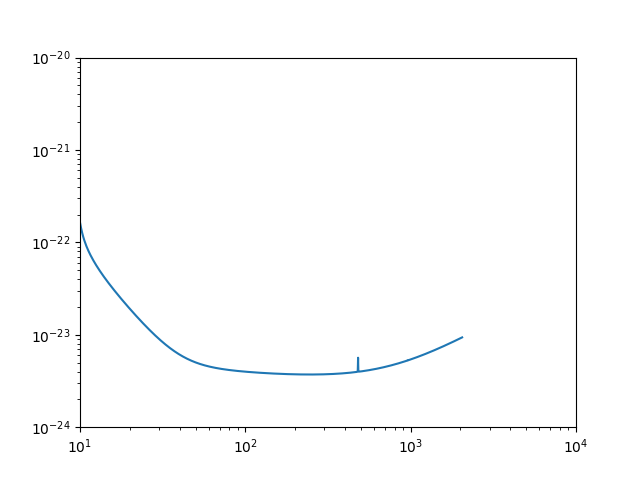

In [39]:
from scipy import integrate, interpolate, signal, optimize, stats
nos = readnos('H1', f_points)
plt.plot(f_points, nos)
plt.yscale('log')
plt.xscale('log')
plt.xlim([10,10000])
plt.ylim(1e-24, 1e-20)
plt.show()